In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber','CustomerId','Surname','Geography'],axis = 'columns',inplace = True)
df.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
df.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.shape

(10000, 10)

In [6]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='CreditScore', ylabel='Count'>

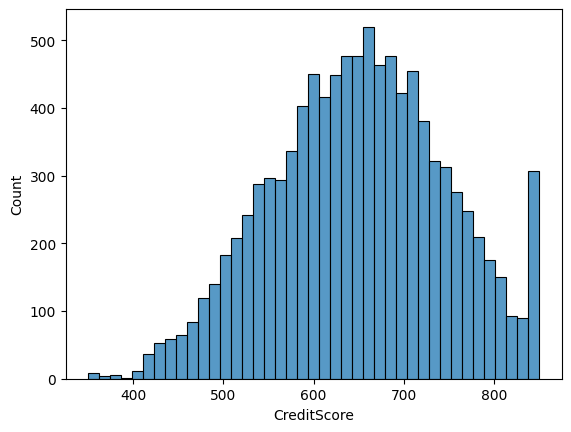

In [7]:
sn.histplot(df.CreditScore)

In [8]:
min_value = df.CreditScore.quantile(0.01)
max_value = df.CreditScore.quantile(0.99)
df2 = df[(df.CreditScore>min_value)&(df.CreditScore<max_value)]

<Axes: xlabel='CreditScore', ylabel='Count'>

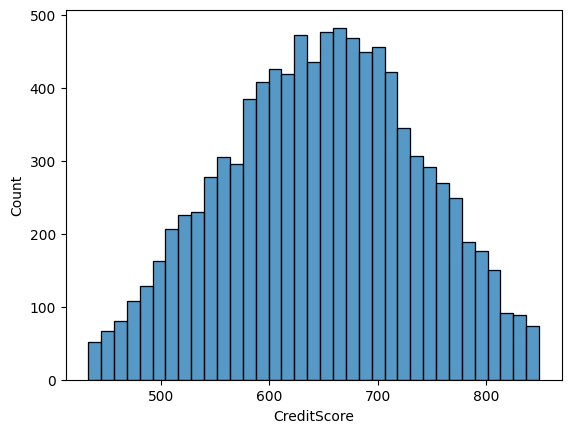

In [9]:
sn.histplot(df2.CreditScore)

In [10]:
df2.shape

(9663, 10)

In [11]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df_male = df2[df2.Gender=='Male']
df_female = df2[df2.Gender=='Female']

<BarContainer object of 2 artists>

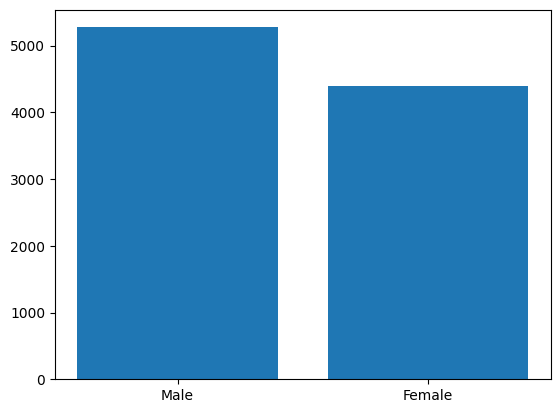

In [13]:
plt.bar(['Male','Female'],[df_male.shape[0],df_female.shape[0]])

In [14]:
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

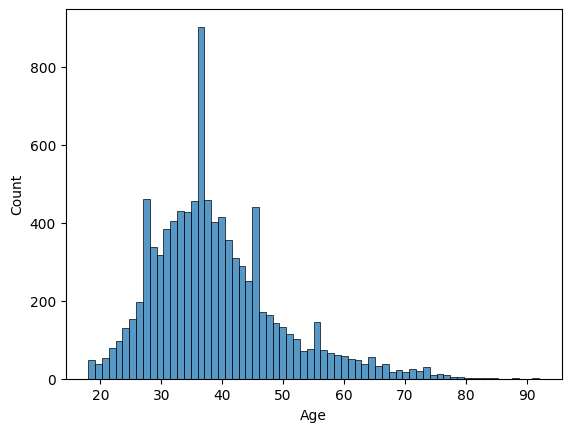

In [15]:
sn.histplot(df2.Age)

<Axes: xlabel='Age', ylabel='Count'>

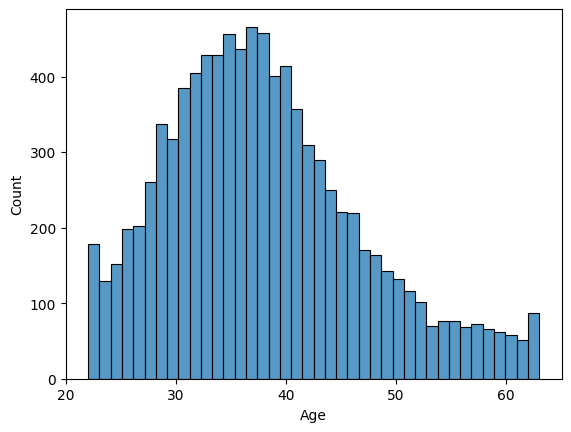

In [16]:
min_value = df2.Age.quantile(0.011)
max_value = df2.Age.quantile(0.97)
df3 = df2[(df2.Age>min_value)&(df2.Age<max_value)]
sn.histplot(df3.Age)

In [17]:
df3.shape

(9215, 10)

In [18]:
df3.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<Axes: xlabel='Tenure', ylabel='Count'>

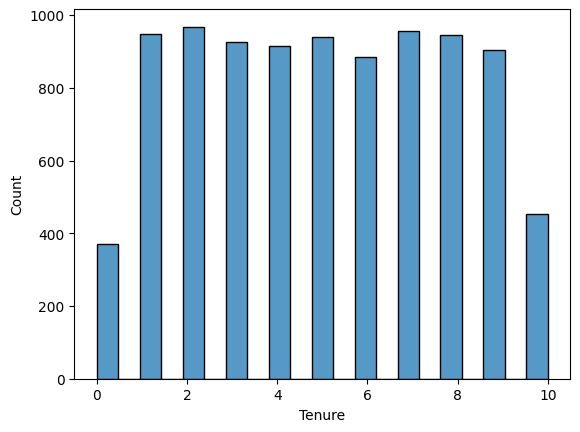

In [19]:
sn.histplot(df3.Tenure)

In [20]:
df3.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<Axes: xlabel='Balance', ylabel='Count'>

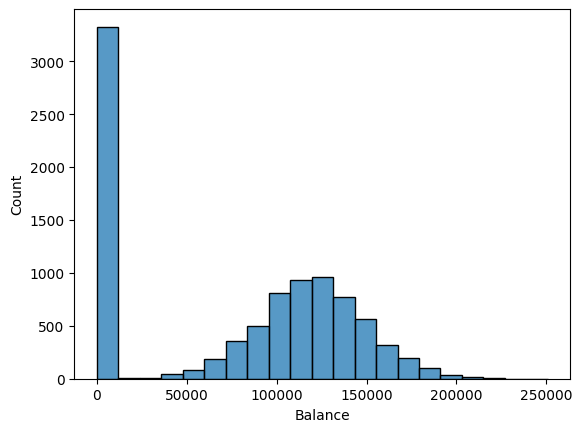

In [21]:
sn.histplot(df3.Balance)

<Axes: xlabel='Balance', ylabel='Count'>

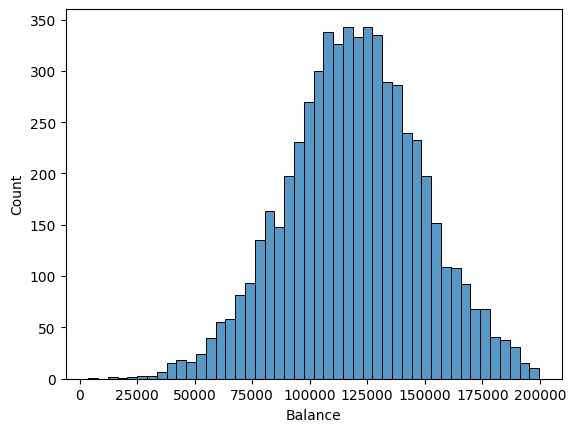

In [22]:
df4 = df3[(df3.Balance >0)&(df3.Balance <=200000)]
sn.histplot(df4.Balance)

In [23]:
df4.shape

(5860, 10)

In [24]:
df4.Balance.value_counts

<bound method IndexOpsMixin.value_counts of 1        83807.86
2       159660.80
5       113755.78
8       142051.07
9       134603.88
          ...    
9991     88381.21
9993    155060.41
9996     57369.61
9998     75075.31
9999    130142.79
Name: Balance, Length: 5860, dtype: float64>

In [25]:
df4[df4.Balance==0].shape

(0, 10)

In [26]:
df4.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [27]:
df4.drop('NumOfProducts',axis='columns',inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9644\83547946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('NumOfProducts',axis='columns',inplace=True)


In [28]:
df4.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Female,41,1,83807.86,0,1,112542.58,0
2,502,Female,42,8,159660.80,1,0,113931.57,1
5,645,Male,44,8,113755.78,1,0,149756.71,1
8,501,Male,44,4,142051.07,0,1,74940.50,0
9,684,Male,27,2,134603.88,1,1,71725.73,0


In [29]:
df4.HasCrCard.unique()

array([0, 1])

<BarContainer object of 2 artists>

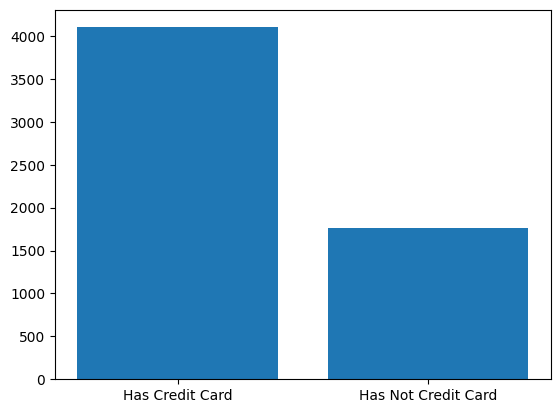

In [30]:
df_has_cr = df4[df4.HasCrCard==1]
df_no_cr = df4[df4.HasCrCard==0]
plt.bar(["Has Credit Card","Has Not Credit Card"],[df_has_cr.shape[0],df_no_cr.shape[0]])

In [31]:
df_no_cr = df_no_cr.sample(df_has_cr.shape[0], replace = True)

In [32]:
df5 = pd.concat([df_no_cr,df_has_cr])

In [33]:
df5.shape

(8204, 9)

<BarContainer object of 2 artists>

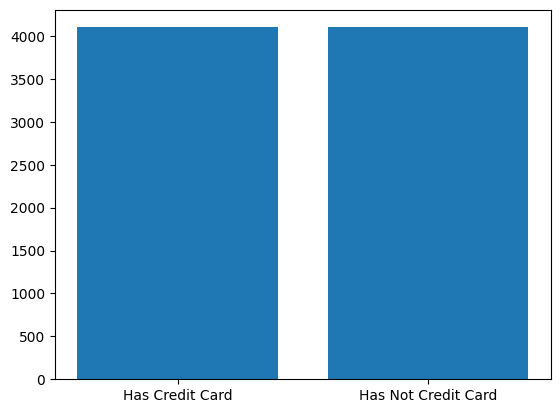

In [34]:
df_has_cr = df5[df5.HasCrCard==1]
df_no_cr = df5[df5.HasCrCard==0]
plt.bar(["Has Credit Card","Has Not Credit Card"],[df_has_cr.shape[0],df_no_cr.shape[0]])

In [35]:
df5.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [36]:
df5.IsActiveMember.unique()

array([1, 0])

<BarContainer object of 2 artists>

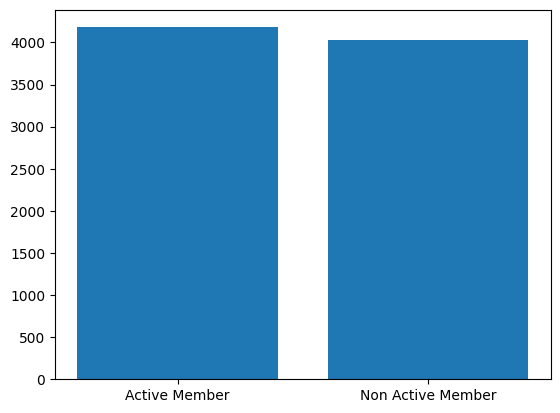

In [37]:
df_active = df5[df5.IsActiveMember==1]
df_non_active = df5[df5.IsActiveMember==0]
plt.bar(["Active Member","Non Active Member"],[df_active.shape[0],df_non_active.shape[0]])

In [38]:
df5.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

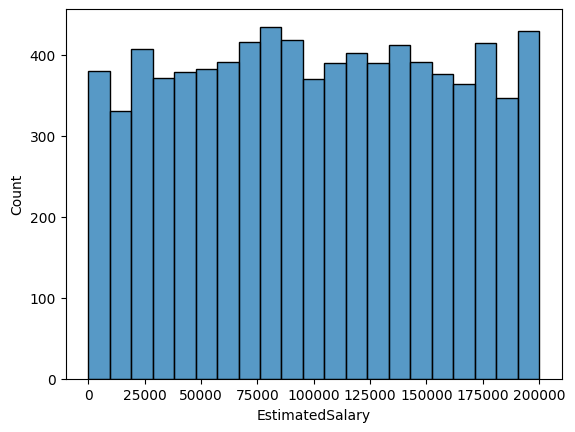

In [39]:
sn.histplot(df5.EstimatedSalary)

In [40]:
df5.shape

(8204, 9)

In [41]:
df5.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1875,572,Male,31,5,98108.79,0,1,119996.95,0
3474,720,Male,33,6,97188.62,0,0,91881.29,0
4310,784,Male,38,5,136712.91,0,1,169920.92,0
589,519,Female,47,6,157296.02,0,0,147278.43,1
5117,757,Male,31,10,39539.39,0,0,192519.39,0


<BarContainer object of 2 artists>

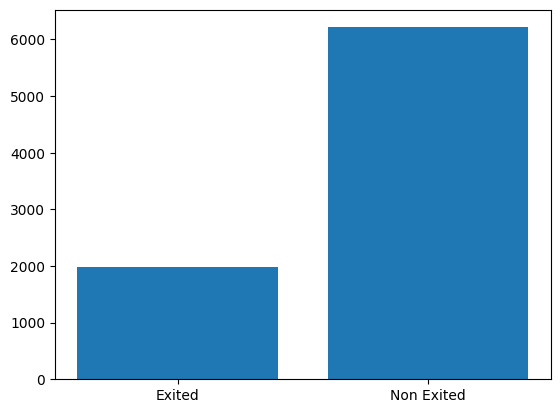

In [42]:
df_exit = df5[df5.Exited==1]
df_non_exit = df5[df5.Exited==0]
plt.bar(["Exited","Non Exited"],[df_exit.shape[0],df_non_exit.shape[0]])

In [43]:
df_exit = df_exit.sample(df_non_exit.shape[0], replace = True)

In [44]:
df6 = pd.concat([df_exit,df_non_exit])

In [45]:
df6.shape

(12428, 9)

<BarContainer object of 2 artists>

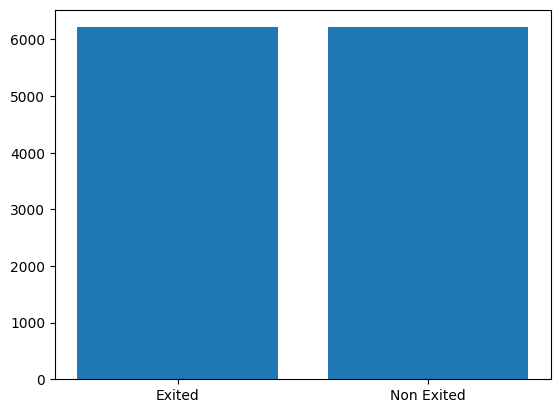

In [46]:
df_exit = df6[df6.Exited==1]
df_non_exit = df6[df6.Exited==0]
plt.bar(["Exited","Non Exited"],[df_exit.shape[0],df_non_exit.shape[0]])

In [47]:
df6.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
494,673,Female,38,2,170061.92,0,0,134901.34,1
7813,684,Female,63,3,81245.79,1,0,69643.31,1
2966,511,Male,45,5,68375.27,1,0,193160.25,1
8884,686,Female,38,2,93569.86,0,0,10137.34,1
2769,580,Female,38,1,128218.47,1,0,125953.83,1


In [48]:
df6['Gender']= df6['Gender'].apply(lambda x: 0 if x =='Male' else 1)

In [49]:
df6.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
494,673,1,38,2,170061.92,0,0,134901.34,1
7813,684,1,63,3,81245.79,1,0,69643.31,1
2966,511,0,45,5,68375.27,1,0,193160.25,1
8884,686,1,38,2,93569.86,0,0,10137.34,1
2769,580,1,38,1,128218.47,1,0,125953.83,1


In [50]:
df6['EstimatedSalary'] = df6['EstimatedSalary'].apply(lambda x: int(x))

In [51]:
df6.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
494,673,1,38,2,170061.92,0,0,134901,1
7813,684,1,63,3,81245.79,1,0,69643,1
2966,511,0,45,5,68375.27,1,0,193160,1
8884,686,1,38,2,93569.86,0,0,10137,1
2769,580,1,38,1,128218.47,1,0,125953,1


In [52]:
df6['CreditScore'] = df6['CreditScore'].apply(lambda x: x/100)
df6['Balance'] = df6['Balance'].apply(lambda x: x/10000)
df6['EstimatedSalary'] = df6['EstimatedSalary'].apply(lambda x: x/10000)

In [53]:
df6.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
494,6.73,1,38,2,17.006192,0,0,13.4901,1
7813,6.84,1,63,3,8.124579,1,0,6.9643,1
2966,5.11,0,45,5,6.837527,1,0,19.3160,1
8884,6.86,1,38,2,9.356986,0,0,1.0137,1
2769,5.80,1,38,1,12.821847,1,0,12.5953,1


In [54]:
df6[df6.Balance!=0]

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
494,6.73,1,38,2,17.006192,0,0,13.4901,1
7813,6.84,1,63,3,8.124579,1,0,6.9643,1
2966,5.11,0,45,5,6.837527,1,0,19.3160,1
8884,6.86,1,38,2,9.356986,0,0,1.0137,1
2769,5.80,1,38,1,12.821847,1,0,12.5953,1
...,...,...,...,...,...,...,...,...,...
9987,6.06,0,30,8,18.030773,1,1,0.1914,0
9990,7.14,0,33,3,3.501660,1,0,5.3667,0
9993,6.44,0,28,7,15.506041,1,0,2.9179,0
9996,5.16,0,35,10,5.736961,1,1,10.1699,0


In [55]:
#from sklearn.preprocessing import MinMaxScaler

In [56]:
#scaler = MinMaxScaler()

In [57]:
#balance_new = scaler.fit_transform(df6[['Balance']])

In [58]:
#df6['Balance_New'] = balance_new

In [59]:
#df6

In [60]:
X= df6.drop("Exited",axis = 'columns')
Y= df6[['Exited']]

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)

In [62]:
x_train.shape

(9942, 8)

In [63]:
x_test.shape

(2486, 8)

In [64]:
x_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
3258,6.98,1,36,7,12.126362,1,1,1.3387
5712,6.60,0,35,9,11.394858,1,0,18.8891
3681,6.76,1,40,2,14.780348,1,0,9.5181
1752,7.44,1,41,2,8.411341,1,0,19.7548
8952,5.65,1,47,10,13.975612,1,0,16.5849
237,5.39,1,43,3,11.622050,1,0,5.5803
8387,6.99,0,44,8,15.869761,1,0,10.7181
2569,6.41,1,40,2,11.008669,1,0,15.9773
1373,5.28,1,46,9,13.555566,1,0,13.3146
301,6.16,1,36,6,13.231171,0,0,1.5462


In [65]:
len(x_train.columns)

8

In [77]:
#import tensorflow as tf
#from tensorflow import keras


#model = keras.Sequential([
 #   keras.layers.Dense(5, input_shape=(8,), activation = 'relu'),
  #  keras.layers.Dense(15, activation = 'relu'),
   # keras.layers.Dense(30, activation = 'relu'),
   # keras.layers.Dense(1,activation = 'sigmoid'),
#])
#model.compile(optimizer = 'adam',
 #           loss = 'binary_crossentropy',
         #    metrics = ['accuracy'])
#model.fit(x_train, y_train, epochs=50)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

D:\DLProjects\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
model.score(x_test,y_test)

0.9549477071600966

In [123]:
prediction = [int(i) for i in list(model.predict(x_test))]
positive=0
negative=0
for i in prediction:
    if i==0:
        positive+=1
    else:
        negative+=1
print(f"Customer Will Leave : {negative}\n Customer will not leave : {positive}")

Customer Will Leave : 1309
 Customer will not leave : 1177


In [81]:
df6.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [108]:
def predict (credit_score,gender,age,tenure,balance,hascr,active,salary,model):
    label = ["Customer Will Not Leave","Customer Will Leave"]
    gender_int = 0 if gender=="Male" else 1
    balance = balance/10000
    credit_score = credit_score/100
    X = [credit_score,gender_int,age,tenure,balance,hascr,active,salary]
    prediction = label[int(model.predict([X])[0])]
    return prediction

In [117]:
predict(3000000,1,54,5,3000,0,0,2000,model)

[1]


D:\DLProjects\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\DLProjects\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Customer Will Leave'